In [1]:
import mlflow
import sys
import torch
sys.path.append('..')

from datasets.cwru_dataset import CrwuDataset
from datasets.pu_dataset import PUDataset
import os

os.chdir('..')

In [2]:
mlflow.set_tracking_uri("http://localhost:5000")

In [3]:
window_size = 2048

In [4]:
model = mlflow.pytorch.load_model(f"models:/transformer_encoder_cwru_{window_size}/1")

/home/soroosh/anaconda3/envs/kan/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


31e4298a9cbceb4cb419071ddfcf9bf2aae8507f3add8f67ea83ab4e45a56f43 b6fe98ec-fc94-4980-bd55-dee845c4cb88


In [49]:
dataset = PUDataset(rdir="./data/dataset/PU/", window_size=window_size)

Loaded existing files information.
Using existing processed file: K006_N15_M07_F10_7_2048_2048.npy
Using existing processed file: K006_N15_M01_F10_3_2048_2048.npy
Using existing processed file: K006_N15_M01_F10_14_2048_2048.npy
Using existing processed file: K006_N15_M01_F10_15_2048_2048.npy
Using existing processed file: K006_N15_M07_F10_12_2048_2048.npy
Using existing processed file: K006_N09_M07_F10_5_2048_2048.npy
Using existing processed file: K006_N15_M01_F10_13_2048_2048.npy
Using existing processed file: K006_N15_M07_F04_11_2048_2048.npy
Using existing processed file: K006_N15_M01_F10_18_2048_2048.npy
Using existing processed file: K006_N15_M07_F04_13_2048_2048.npy
Using existing processed file: K006_N09_M07_F10_13_2048_2048.npy
Using existing processed file: K006_N15_M01_F10_17_2048_2048.npy
Using existing processed file: K006_N15_M07_F04_5_2048_2048.npy
Using existing processed file: K006_N15_M01_F10_9_2048_2048.npy
Using existing processed file: K006_N15_M07_F10_10_2048_2048

Text(0.5, 1.0, 'True Label: InnerRace')

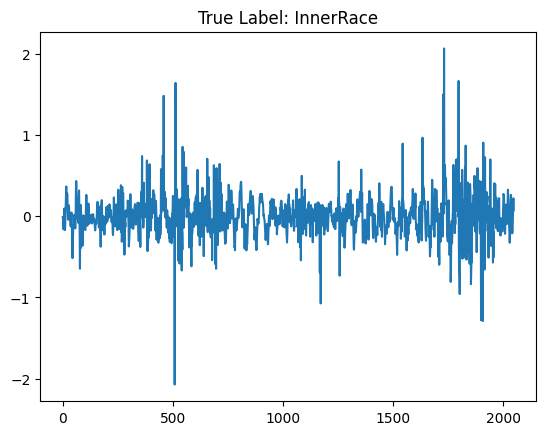

In [66]:
# Choose a sample for inference
index = 80000
sample_X, sample_y = dataset[index]

labels = dataset.labels()

from matplotlib import pyplot as plt
plt.plot(sample_X.flatten())
plt.title(f"True Label: {labels[sample_y]}")

In [67]:
import pandas as pd
pd.DataFrame({ 'row': range(len(sample_X.flatten())),'ch1': sample_X.flatten()}).to_csv("sample_X.csv", index=False)

In [47]:
cwru_labels = [
            "Normal",
            "0.007-Ball",
            "0.014-Ball",
            "0.021-Ball",
            "0.007-InnerRace",
            "0.014-InnerRace",
            "0.021-InnerRace",
            "0.007-OuterRace",
            "0.014-OuterRace",
            "0.021-OuterRace",
]

In [ ]:
model.eval()
with torch.no_grad():
    input_tensor = torch.tensor(sample_X.reshape(1, 1, -1), dtype=torch.float32)
    output = model(input_tensor)
    predicted_class = torch.argmax(output, dim=1).item()
    print(f"Predicted Label: {cwru_labels[predicted_class]}")
    print(f"True Label: {labels[sample_y]}")
    print(f"Output: {torch.softmax(output, dim=1)}")